In [15]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

In [8]:
raw_assembly = SeqIO.parse("/Users/tkoti/LabWork/RogLab/assemblmore_testing/C_Briggsae/assembly.fasta", "fasta")
assemblmore_assembly = SeqIO.parse("/Users/tkoti/LabWork/RogLab/assemblmore_testing/C_Briggsae/Slop_question_mark/assemblmore_output/assemblmore_final_assembly.fasta", "fasta")


In [9]:
raw_assembly = list(raw_assembly)
assemblmore_assembly = list(assemblmore_assembly)

In [4]:
#########Contiguity Metrics#########

In [10]:
def calc_NX(assembly, n):
    """
    Calculate NX of a given assembly.
    """
    lengths = sorted((len(record.seq) for record in assembly), reverse=True)
    total_length = sum(lengths)
    half_length = total_length / (100 / n)
    cumulative_length = 0
    for length in lengths:
        cumulative_length += length
        if cumulative_length >= half_length:
            return length
    return 0

def CC_Ratio(assembly, num_chromosomes):
    """
    Calculate the CC ratio of an assembly.
    """
    return len(assembly) / num_chromosomes

def auN(assembly):

    numerator = sum([len(record.seq)**2 for record in assembly])
    denominator = sum([len(record.seq) for record in assembly])
    return numerator / denominator if denominator > 0 else 0


calc_N50_raw = calc_NX(raw_assembly, 50)
calc_N50_assemblmore = calc_NX(assemblmore_assembly, 50)
calc_N50_raw, calc_N50_assemblmore

CC_Ratio_raw = CC_Ratio(raw_assembly, 7)
CC_Ratio_assemblmore = CC_Ratio(assemblmore_assembly, 7)
CC_Ratio_raw, CC_Ratio_assemblmore

auN_raw = auN(raw_assembly)
auN_assemblmore = auN(assemblmore_assembly)
auN_raw, auN_assemblmore


(11379062.817825144, 16292553.255382296)

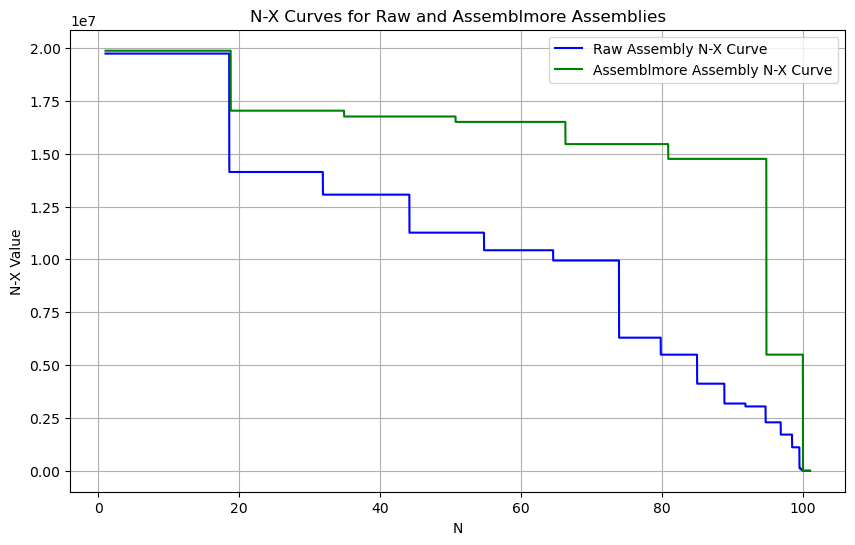

In [24]:
nx_curve_raw = [calc_NX(raw_assembly, n) for n in np.linspace(1, 101, num=10000)]
nx_curve_assemblmore = [calc_NX(assemblmore_assembly, n) for n in np.linspace(1, 101, num=10000)]
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 101, num=10000), nx_curve_raw, label='Raw Assembly N-X Curve', color='blue')
plt.plot(np.linspace(1, 101, num=10000), nx_curve_assemblmore, label='Assemblmore Assembly N-X Curve', color='green')
plt.xlabel('N')
plt.ylabel('N-X Value')
plt.title('N-X Curves for Raw and Assemblmore Assemblies')
plt.legend()
plt.grid()
plt.show()


In [ ]:
##############################

In [ ]:
#######Completeness Metrics#########

In [ ]:
# Idea: Coverage should be approximately constant across the genome.
# In reality, it will vary, i.e telomeres usually have higher coverage as adapter ligation happens easier there.

# Assuming the idea is true however, getting the mean squared deviation of the coverage across the genome 
# should give us a good idea of the collapsed repeat landscape etc.

In [23]:
import pandas as pd

In [24]:
coverage_data = pd.read_csv('/Users/tkoti/LabWork/RogLab/assemblmore_testing/C_Briggsae/merge_test_1/C_briggsae_AF16.fasta_mapped_to_penultimate_automated_assembly.sorted.bam.tdf.bedgraph', sep = '\t', header = None)

In [29]:
by_chr = list(coverage_data.groupby(0))

In [31]:
test = by_chr[0]

In [35]:
test_chr = test[0]
test_coverage_df = test[1]
test_coverage = test_coverage_df[3]

In [38]:
coverage_mean = test_coverage.mean()

In [39]:
coverage_mean_squared_deviation = ((test_coverage - coverage_mean) ** 2).mean()

In [40]:
coverage_mean_squared_deviation

np.float64(43896.87651899429)

In [41]:
total = 0
for i in range(len(by_chr)):
    test = by_chr[i]
    test_chr = test[0]
    test_coverage_df = test[1]
    test_coverage = test_coverage_df[3]
    
    coverage_mean = test_coverage.mean()
    coverage_mean_squared_deviation = ((test_coverage - coverage_mean) ** 2).mean()
    
    total += coverage_mean_squared_deviation

In [42]:
total

np.float64(57149.297628114844)